In [90]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import random


In [91]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [120]:
# Use the citipy module to determine city based on latitude and longitude.
#from citipy import citipy


In [121]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
 #         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [143]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [144]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [145]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=beb68f35f6baedad35bf9775266d8c30&q=Boston


In [146]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [147]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [148]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [149]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":52.92,"feels_like":50.72,"temp_min":50.67,"temp_max":55.09,"pressure":1023,"humidity":60},"visibility":10000,"wind":{"speed":15.99,"deg":0,"gust":25.99},"clouds":{"all":65},"dt":1664741692,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1664707334,"sunset":1664749484},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [150]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 52.92,
  'feels_like': 50.72,
  'temp_min': 50.67,
  'temp_max': 55.09,
  'pressure': 1023,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 15.99, 'deg': 0, 'gust': 25.99},
 'clouds': {'all': 65},
 'dt': 1664741692,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664707334,
  'sunset': 1664749484},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [151]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [152]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [153]:
#print(city_url)

In [154]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 52.92,
  'feels_like': 50.72,
  'temp_min': 50.67,
  'temp_max': 55.09,
  'pressure': 1023,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 15.99, 'deg': 0, 'gust': 25.99},
 'clouds': {'all': 65},
 'dt': 1664741692,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664707334,
  'sunset': 1664749484},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [155]:
# Get the JSON data.
boston_data = city_weather.json()

In [156]:
boston_data['sys']['country']

'US'

In [157]:
boston_data['dt']

1664741692

In [158]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 55.09 60 65 15.99


In [159]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-02 20:14:52'

In [160]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [161]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [162]:
# Run an API request for each of the cities.
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [163]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

""


In [164]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [116]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

KeyError: 'Lat'

In [117]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664732772.0592196

ValueError: x and y must be the same size

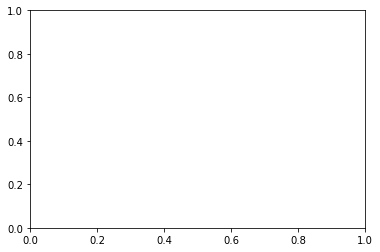

In [118]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [119]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

NameError: name 'cloudiness' is not defined